IPL BEST PLAYER ANALYSIS

Libary

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)

In [ ]:
matches = pd.read_csv('matches.csv')
balls = pd.read_csv('IPL_BallByBall2008_2024(Updated).csv')

In [ ]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
print(matches.shape)
print('------------')
print(matches.isnull().sum())
print('------------')
print(matches.info())

(1095, 20)
------------
id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64
------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   obj

In [ ]:
matches[matches['winner'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
241,501265,2011,Delhi,2011-05-21,League,NaN,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,no result,NaN,NaN,NaN,N,NaN,SS Hazare,RJ Tucker
485,829763,2015,Bangalore,2015-04-29,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,NaN,NaN,N,NaN,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,no result,NaN,188.0,20.0,N,NaN,HDPK Dharmasena,K Srinivasan
744,1178424,2019,Bengaluru,2019-04-30,League,NaN,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,63.0,5.0,N,NaN,NJ Llong,UV Gandhe
994,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,NaN,no result,NaN,NaN,NaN,N,NaN,AK Chaudhary,NA Patwardhan


In [ ]:
#remove unwanted columns
matches.drop(['city','id','method'],axis=1,inplace=True)
matches = matches.dropna()

In [ ]:
matches.head()

,season,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
0,2007/08,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen
1,2007/08,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,MR Benson,SL Shastri
2,2007/08,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,Aleem Dar,GA Pratapkumar
3,2007/08,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,SJ Davis,DJ Harper
4,2007/08,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,BF Bowden,K Hariharan


In [ ]:
matches['date'] = pd.to_datetime(matches['date'])

In [ ]:
#convert the column types to their respective datatypes
matches['SEASON_INT'] = matches['season'].apply(lambda x: int(x[:4]))
matches['SEASON_END'] = matches['season'].apply(lambda x: int("20"+str(x[5:])) if len(x)>5 else int(x[:4]))

In [ ]:
matches.drop(['season'],axis=1,inplace=True)

In [ ]:
matches['winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

In [ ]:
matches['team1'] = matches['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
matches['team2'] = matches['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
matches['winner'] = matches['winner'].str.replace('Delhi Daredevils','Delhi Capitals')

matches['team1'] = matches['team1'].str.replace('Kings XI Punjab','Punjab Kings')
matches['team2'] = matches['team2'].str.replace('Kings XI Punjab','Punjab Kings')
matches['winner'] = matches['winner'].str.replace('Kings XI Punjab','Punjab Kings')

matches['team1'] = matches['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
matches['team2'] = matches['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
matches['winner'] = matches['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')


matches['team1'] = matches['team1'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
matches['team2'] = matches['team2'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
matches['winner'] = matches['winner'].str.replace('Rising Pune Supergiant', 'Pune Warriors')

matches['team1'] = matches['team1'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
matches['team2'] = matches['team2'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
matches['winner'] = matches['winner'].str.replace('Rising Pune Supergiants', 'Pune Warriors')

matches['team1'] = matches['team1'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches['team2'] = matches['team2'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches['winner'] = matches['winner'].str.replace('Gujarat Lions', 'Gujarat Titans')


In [ ]:
matches.head()

,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2,SEASON_INT,SEASON_END
0,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen,2007,2008
1,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,MR Benson,SL Shastri,2007,2008
2,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,130.0,20.0,N,Aleem Dar,GA Pratapkumar,2007,2008
3,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,SJ Davis,DJ Harper,2007,2008
4,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,BF Bowden,K Hariharan,2007,2008


Ball by Ball DataFrame

In [ ]:
balls.head()

,Match id,Date,Season,Batting team,Bowling team,Innings No,Ball No,Bowler,Striker,Non Striker,runs_scored,extras,type of extras,score,score/wicket,wicket_confirmation,wicket_type,fielders_involved,Player Out
0,335982,2008-04-18,2007/08,Kolkata Knight Riders,Royal Challengers Bangalore,1,0.1,P Kumar,SC Ganguly,BB McCullum,0,1,legbyes,1,1/0,0,NaN,NaN,NaN
1,335982,2008-04-18,2007/08,Kolkata Knight Riders,Royal Challengers Bangalore,1,0.2,P Kumar,BB McCullum,SC Ganguly,0,0,NaN,1,1/0,0,NaN,NaN,NaN
2,335982,2008-04-18,2007/08,Kolkata Knight Riders,Royal Challengers Bangalore,1,0.2,P Kumar,BB McCullum,SC Ganguly,0,1,wides,2,2/0,0,NaN,NaN,NaN
3,335982,2008-04-18,2007/08,Kolkata Knight Riders,Royal Challengers Bangalore,1,0.3,P Kumar,BB McCullum,SC Ganguly,0,0,NaN,2,2/0,0,NaN,NaN,NaN
4,335982,2008-04-18,2007/08,Kolkata Knight Riders,Royal Challengers Bangalore,1,0.4,P Kumar,BB McCullum,SC Ganguly,0,0,NaN,2,2/0,0,NaN,NaN,NaN


In [ ]:
print(balls.shape)
print('------------')
print(balls.isnull().sum())
print('------------')
print(balls.info())

(255759, 19)
------------
Match id                    0
Date                        0
Season                      0
Batting team                0
Bowling team                0
Innings No                  0
Ball No                     0
Bowler                      0
Striker                     0
Non Striker                 0
runs_scored                 0
extras                      0
type of extras         241936
score                       0
score/wicket                0
wicket_confirmation         0
wicket_type            243108
fielders_involved      246637
Player Out             243108
dtype: int64
------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255759 entries, 0 to 255758
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Match id             255759 non-null  int64  
 1   Date                 255759 non-null  object 
 2   Season               255759 non-null  object 
 3   Batting

In [ ]:
batgroup = balls.groupby(['Striker'])
bat_stats = pd.DataFrame(batgroup['Ball No'].count()).rename(columns={'Ball No':'Balls_Faced'})
bat_stats.head()

,Balls_Faced
Striker,
A Ashish Reddy,196
A Badoni,441
A Chandila,7
A Chopra,75
A Choudhary,20


In [ ]:
bat_stats['Innings No'] = batgroup['Innings No'].nunique()
bat_stats.head()


,Balls_Faced,Innings No
Striker,,
A Ashish Reddy,196,2
A Badoni,441,2
A Chandila,7,1
A Chopra,75,2
A Choudhary,20,2


In [ ]:
bat_stats['Runs'] = batgroup['runs_scored'].sum()
bat_stats.head()

,Balls_Faced,Innings No,Runs
Striker,,,
A Ashish Reddy,196,2,280
A Badoni,441,2,536
A Chandila,7,1,4
A Chopra,75,2,53
A Choudhary,20,2,25


In [ ]:
bat_stats['0s'] = balls[balls['runs_scored'] == 0].groupby('Striker')['runs_scored'].count()
bat_stats['0s'].fillna(0,inplace=True)
bat_stats.head()

,Balls_Faced,Innings No,Runs,0s
Striker,,,,
A Ashish Reddy,196,2,280,61.0
A Badoni,441,2,536,165.0
A Chandila,7,1,4,3.0
A Chopra,75,2,53,45.0
A Choudhary,20,2,25,4.0


In [ ]:
bat_stats['1s'] = balls[balls['runs_scored']==1].groupby('Striker')['runs_scored'].count()
bat_stats['1s'].fillna(0,inplace=True)
bat_stats.head()

,Balls_Faced,Innings No,Runs,0s,1s
Striker,,,,,
A Ashish Reddy,196,2,280,61.0,83.0
A Badoni,441,2,536,165.0,175.0
A Chandila,7,1,4,3.0,4.0
A Chopra,75,2,53,45.0,21.0
A Choudhary,20,2,25,4.0,13.0


In [ ]:
bat_stats['2s'] = balls[balls['runs_scored']==2].groupby('Striker')['runs_scored'].count()
bat_stats['2s'].fillna(0,inplace=True)
bat_stats['3s'] = balls[balls['runs_scored']==3].groupby('Striker')['runs_scored'].count()
bat_stats['3s'].fillna(0,inplace=True)
bat_stats['4s'] = balls[balls['runs_scored']==4].groupby('Striker')['runs_scored'].count()
bat_stats['4s'].fillna(0,inplace=True)
bat_stats['6s'] = balls[balls['runs_scored']==6].groupby('Striker')['runs_scored'].count()
bat_stats['6s'].fillna(0,inplace=True)
bat_stats.head()

,Balls_Faced,Innings No,Runs,0s,1s,2s,3s,4s,6s
Striker,,,,,,,,,
A Ashish Reddy,196,2,280,61.0,83.0,20.0,1.0,16.0,15.0
A Badoni,441,2,536,165.0,175.0,41.0,3.0,36.0,21.0
A Chandila,7,1,4,3.0,4.0,0.0,0.0,0.0,0.0
A Chopra,75,2,53,45.0,21.0,2.0,0.0,7.0,0.0
A Choudhary,20,2,25,4.0,13.0,1.0,0.0,1.0,1.0


In [ ]:
bat_stats['Player Out'] = batgroup['Player Out'].count()
bat_stats.head()

,Balls_Faced,Innings No,Runs,0s,1s,2s,3s,4s,6s,Player Out
Striker,,,,,,,,,,
A Ashish Reddy,196,2,280,61.0,83.0,20.0,1.0,16.0,15.0,15
A Badoni,441,2,536,165.0,175.0,41.0,3.0,36.0,21.0,24
A Chandila,7,1,4,3.0,4.0,0.0,0.0,0.0,0.0,1
A Chopra,75,2,53,45.0,21.0,2.0,0.0,7.0,0.0,5
A Choudhary,20,2,25,4.0,13.0,1.0,0.0,1.0,1.0,2


In [ ]:
bat_stats['Batter Avg'] = round(bat_stats['Runs']/bat_stats['Player Out'],2)
bat_stats['Strike Rate']  = round((bat_stats['Runs']/bat_stats['Balls_Faced'])*100,2)
bat_stats.head()

,Balls_Faced,Innings No,Runs,0s,1s,2s,3s,4s,6s,Player Out,Batter Avg,Strike Rate
Striker,,,,,,,,,,,,
A Ashish Reddy,196,2,280,61.0,83.0,20.0,1.0,16.0,15.0,15,18.67,142.86
A Badoni,441,2,536,165.0,175.0,41.0,3.0,36.0,21.0,24,22.33,121.54
A Chandila,7,1,4,3.0,4.0,0.0,0.0,0.0,0.0,1,4.00,57.14
A Chopra,75,2,53,45.0,21.0,2.0,0.0,7.0,0.0,5,10.60,70.67
A Choudhary,20,2,25,4.0,13.0,1.0,0.0,1.0,1.0,2,12.50,125.00


In [ ]:
bowlgroup = balls.groupby(['Bowler'])
bowler_stats = pd.DataFrame(bowlgroup['Ball No'].count()).rename(columns={'Ball No':'Ball_Thrown'})
bowler_stats.head()

,Ball_Thrown
Bowler,
A Ashish Reddy,270
A Badoni,19
A Chandila,234
A Choudhary,108
A Dananjaya,25


In [ ]:
bowler_stats['Wickets'] = balls[balls['wicket_type'].isin(['caught','bowled', 'lbw','stumped', 'caught and bowled', 'hit wicket'])].groupby('Bowler')['wicket_confirmation'].count()
bowler_stats.head()

,Ball_Thrown,Wickets
Bowler,,
A Ashish Reddy,270,18.0
A Badoni,19,2.0
A Chandila,234,11.0
A Choudhary,108,5.0
A Dananjaya,25,NaN


In [ ]:
bowler_stats['Overs'] = round(bowler_stats['Ball_Thrown']/6,1)
bowler_stats.head()

,Ball_Thrown,Wickets,Overs
Bowler,,,
A Ashish Reddy,270,18.0,45.0
A Badoni,19,2.0,3.2
A Chandila,234,11.0,39.0
A Choudhary,108,5.0,18.0
A Dananjaya,25,NaN,4.2


In [ ]:
bowler_stats['Runs_conceded'] = balls.groupby('Bowler')['runs_scored'].sum()
bowler_stats['Runs_conceded'] = bowler_stats['Runs_conceded'].fillna(0)
bowler_stats.head()

,Ball_Thrown,Wickets,Overs,Runs_conceded
Bowler,,,,
A Ashish Reddy,270,18.0,45.0,386
A Badoni,19,2.0,3.2,17
A Chandila,234,11.0,39.0,242
A Choudhary,108,5.0,18.0,137
A Dananjaya,25,NaN,4.2,46


In [ ]:
bowler_stats['Runs_conceded'] = bowler_stats['Runs_conceded'].add(balls[balls['type of extras'].isin(['wides','noballs'])].groupby('Bowler')['extras'].sum(),fill_value=0)


In [ ]:
bowler_stats['Economy'] = round(bowler_stats['Runs_conceded']/bowler_stats['Overs'],2)
bowler_stats['bowl_strikerate'] = round(bowler_stats['Ball_Thrown']/bowler_stats['Wickets'],2)
bowler_stats.head()

,Ball_Thrown,Wickets,Overs,Runs_conceded,Economy,bowl_strikerate
Bowler,,,,,,
A Ashish Reddy,270,18.0,45.0,396.0,8.80,15.00
A Badoni,19,2.0,3.2,17.0,5.31,9.50
A Chandila,234,11.0,39.0,242.0,6.21,21.27
A Choudhary,108,5.0,18.0,144.0,8.00,21.60
A Dananjaya,25,NaN,4.2,47.0,11.19,NaN


In [ ]:
players_matches_dict = {}

# Iterate over each row in the dataframe
for i, row in balls.iterrows():
    # Check if the batter is already in the dictionary
    if row['Striker'] in players_matches_dict:
        players_matches_dict[row['Striker']].add(row['Match id'])
    else:
        players_matches_dict[row['Striker']] = {row['Match id']}

    # Check if the non-striker is already in the dictionary
    if row['Non Striker'] in players_matches_dict:
        players_matches_dict[row['Non Striker']].add(row['Match id'])
    else:
        players_matches_dict[row['Non Striker']] = {row['Match id']}

    # Check if the bowler is already in the dictionary
    if row['Bowler'] in players_matches_dict:
        players_matches_dict[row['Bowler']].add(row['Match id'])
    else:
        players_matches_dict[row['Bowler']] = {row['Match id']}

# Create a dataframe with players and their number of matches
final_players_matches = pd.DataFrame({'Players': list(players_matches_dict.keys())})
final_players_matches['matches'] = final_players_matches['Players'].apply(lambda x: len(players_matches_dict[x]))
final_players_matches = final_players_matches.set_index('Players')

In [ ]:
final_players_matches.head()

,matches
Players,
SC Ganguly,57
BB McCullum,109
P Kumar,119
Z Khan,99
AA Noffke,1



# Catches Caught by Players
outbyCatch = balls[(balls['kind'].isin(['caught and bowled']))].groupby('bowler')['ballnumber'].count().rename('bowler_catches')
justCatch = balls[(balls['kind'].isin(['caught']))].groupby('fielders_involved')['ballnumber'].count().rename('fielder_catches')

catchDf = pd.merge(outbyCatch,justCatch, left_index=True, right_index=True,how='outer')
catchDf.fillna(0,inplace=True)
catchDf['catches'] = catchDf['bowler_catches']+catchDf['fielder_catches']
catchDf.drop(['bowler_catches','fielder_catches'],axis=1,inplace=True)

In [ ]:
outbyCatch  = balls[(balls['wicket_type'].isin(['caught and bowled']))].groupby('Bowler')['Ball No'].count().rename("bowler_catches")
justCatch = balls[(balls['wicket_type'].isin(['caught']))].groupby('fielders_involved')['Ball No'].count().rename('fielder_catches')

catchDF = pd.merge(outbyCatch,justCatch, left_index=True, right_index=True,how='outer')
catchDF.fillna(0,inplace=True) # Use catchDF consistently
catchDF['catches'] = catchDF['bowler_catches']+catchDF['fielder_catches']
catchDF.drop(['bowler_catches','fielder_catches'],axis=1,inplace=True)

In [ ]:

# Merging Batsman Stats
final_df = pd.merge(final_players_matches,bat_stats, left_index=True, right_index=True,how='outer')
# Merging Bowler Stats
final_df = pd.merge(final_df,bowler_stats, left_index=True, right_index=True,how='outer')
# Merging Catches Stats of Each Player
final_df = pd.merge(final_df,catchDF, left_index=True, right_index=True,how='outer')
# Merging the data of players who got Man of the Match of not
final_df = pd.merge(final_df,matches['player_of_match'].value_counts(),left_index=True, right_index=True,how='left')
# Making all the NAN values to 0 because they don't have the values Like a person who does not get Player of the Match is marked as NaN so I Make it 0
final_df.fillna(0,inplace=True)

final_df.head(10)


,matches,Balls_Faced,Innings No,Runs,0s,1s,2s,3s,4s,6s,Player Out,Batter Avg,Strike Rate,Ball_Thrown,Wickets,Overs,Runs_conceded,Economy,bowl_strikerate,catches,count
A Ashish Reddy,28.0,196.0,2.0,280.0,61.0,83.0,20.0,1.0,16.0,15.0,15.0,18.67,142.86,270.0,18.0,45.0,396.0,8.80,15.00,9.0,0.0
A Badoni,31.0,441.0,2.0,536.0,165.0,175.0,41.0,3.0,36.0,21.0,24.0,22.33,121.54,19.0,2.0,3.2,17.0,5.31,9.50,14.0,0.0
A Chandila,12.0,7.0,1.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,1.0,4.00,57.14,234.0,11.0,39.0,242.0,6.21,21.27,7.0,1.0
A Chopra,6.0,75.0,2.0,53.0,45.0,21.0,2.0,0.0,7.0,0.0,5.0,10.60,70.67,0.0,0.0,0.0,0.0,0.00,0.00,2.0,0.0
A Choudhary,5.0,20.0,2.0,25.0,4.0,13.0,1.0,0.0,1.0,1.0,2.0,12.50,125.00,108.0,5.0,18.0,144.0,8.00,21.60,0.0,0.0
A Dananjaya,1.0,5.0,1.0,4.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,inf,80.00,25.0,0.0,4.2,47.0,11.19,0.00,0.0,0.0
A Flintoff,3.0,57.0,2.0,62.0,24.0,23.0,2.0,1.0,5.0,2.0,2.0,31.00,108.77,66.0,2.0,11.0,105.0,9.55,33.00,4.0,0.0
A Kumble,42.0,49.0,2.0,35.0,24.0,21.0,1.0,0.0,3.0,0.0,2.0,17.50,71.43,983.0,45.0,163.8,1058.0,6.46,21.84,10.0,3.0
A Manohar,15.0,181.0,2.0,231.0,69.0,75.0,6.0,0.0,21.0,10.0,14.0,16.50,127.62,0.0,0.0,0.0,0.0,0.00,0.00,10.0,1.0
A Mishra,162.0,440.0,2.0,381.0,199.0,183.0,22.0,0.0,31.0,5.0,31.0,12.29,86.59,3444.0,174.0,574.0,4145.0,7.22,19.79,23.0,12.0


In [ ]:
!pip install plotly_express
import plotly.express as px

In [ ]:

# Create the scatter plot to see the Most 0s on the balls they Faced by a Batsman
fig = px.scatter(final_df, x='matches', y='0s',color='0s',
                 size='0s', hover_name=final_df.index, title='Most 0s by a Batsman for each ball they face')
fig.update_layout(coloraxis=dict(colorscale='blues'))

# Show the plot
fig.show()


In [ ]:

# Calculate the ratio of matches to player_out
final_df['not_out'] = final_df['matches'] - final_df['Player Out']

# Create the scatter plot to see the Most Time Out by a Batsman
fig = px.scatter(final_df, x='Player Out', y='not_out', color='Runs',
                 size='Player Out', hover_name=final_df.index,
                 title='Most Time Out by a Batsman vs Matches Played to Player Not Out Matches')
fig.update_layout(coloraxis=dict(colorscale='blues'))

# Show the plot
fig.show()


In [ ]:
final_df = final_df[final_df['matches']>50]
final_df.head()

,matches,Balls_Faced,Innings No,Runs,0s,1s,2s,3s,4s,6s,Player Out,Batter Avg,Strike Rate,Ball_Thrown,Wickets,Overs,Runs_conceded,Economy,bowl_strikerate,catches,count,not_out
A Mishra,162.0,440.0,2.0,381.0,199.0,183.0,22.0,0.0,31.0,5.0,31.0,12.29,86.59,3444.0,174.0,574.0,4145.0,7.22,19.79,23.0,12.0,131.0
A Nehra,88.0,63.0,2.0,41.0,37.0,21.0,1.0,0.0,3.0,1.0,8.0,5.12,65.08,1974.0,106.0,329.0,2495.0,7.58,18.62,19.0,6.0,80.0
AB Dinda,76.0,50.0,2.0,26.0,31.0,16.0,1.0,0.0,2.0,0.0,9.0,2.89,52.00,1589.0,69.0,264.8,2073.0,7.83,23.03,7.0,2.0,67.0
AB de Villiers,170.0,3487.0,4.0,5181.0,1115.0,1420.0,268.0,17.0,414.0,253.0,125.0,41.45,148.58,0.0,0.0,0.0,0.0,0.00,0.00,120.0,24.0,45.0
AC Gilchrist,80.0,1555.0,2.0,2069.0,737.0,417.0,66.0,4.0,239.0,92.0,76.0,27.22,133.05,1.0,1.0,0.2,0.0,0.00,1.00,51.0,7.0,4.0


<Axes: >

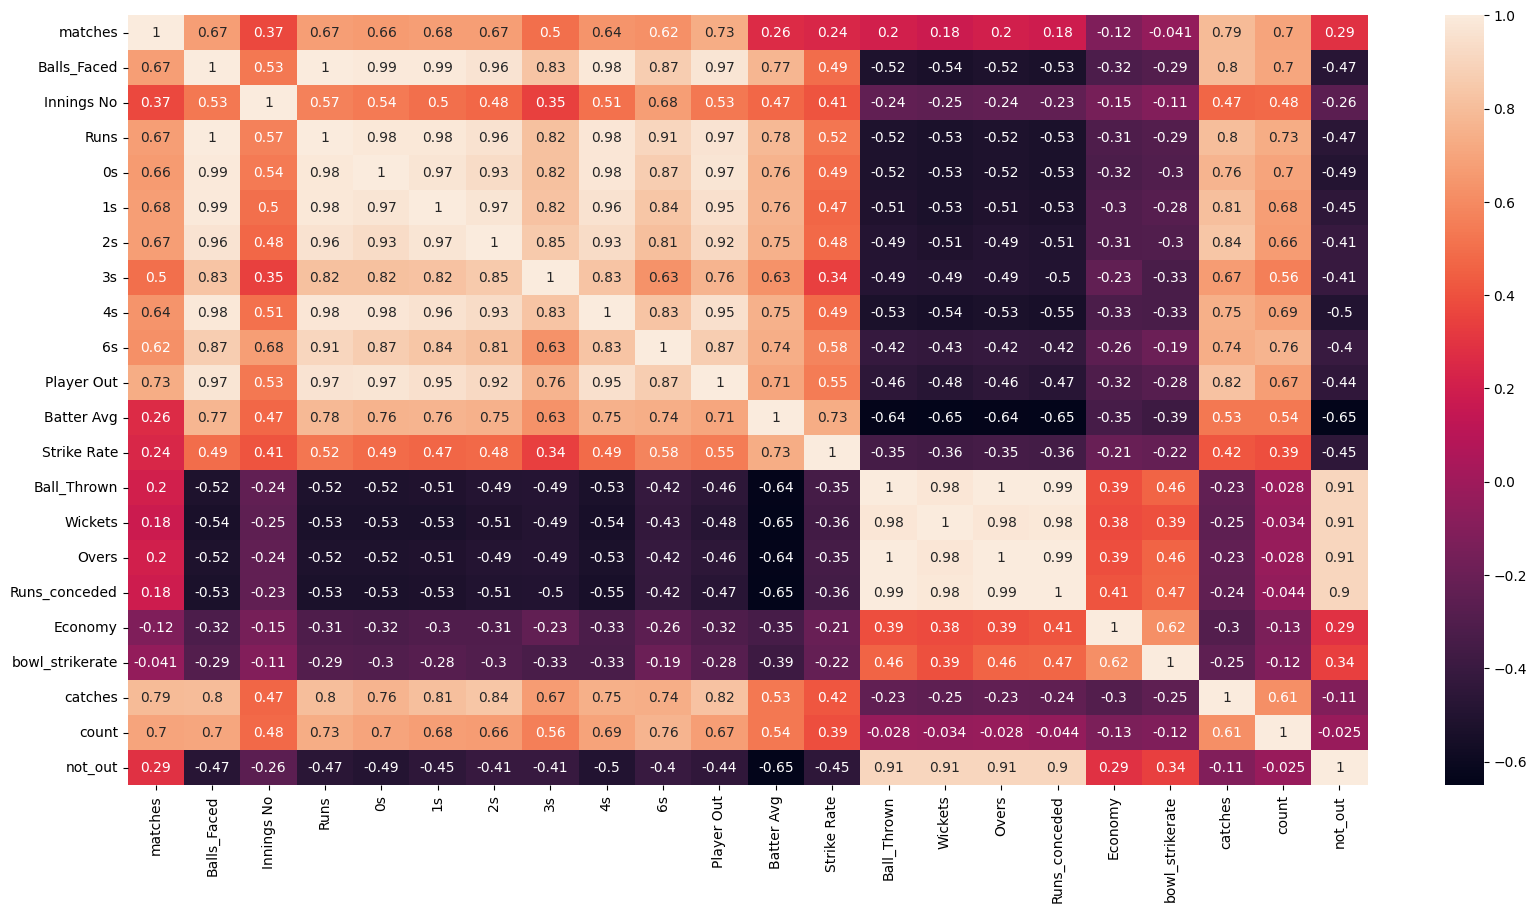

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(final_df.corr(),annot=True)

In [ ]:
def correlation(data, threshold):
    corr_matrix = data.corr()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    col_corr = [col for col in upper_triangle.columns if any(upper_triangle[col] > threshold)]
    return col_corr

In [ ]:
corr_cols = correlation(final_df,0.85)
corr_cols

['Runs',
 '0s',
 '1s',
 '2s',
 '3s',
 '4s',
 '6s',
 'Player Out',
 'Wickets',
 'Overs',
 'Runs_conceded',
 'not_out']

In [ ]:
top_columns =final_df.drop(['Runs',
 '0s',
 '1s',
 '2s',
 '3s',
 '4s',
 '6s',
 'Player Out',
 'Wickets',
 'Overs',
 'Runs_conceded',
 'catches','not_out'],axis=1)

In [ ]:
final_df_new = top_columns[np.isfinite(top_columns).all(1)]
final_df_new.head()

,matches,Balls_Faced,Innings No,Batter Avg,Strike Rate,Ball_Thrown,Economy,bowl_strikerate,count
A Mishra,162.0,440.0,2.0,12.29,86.59,3444.0,7.22,19.79,12.0
A Nehra,88.0,63.0,2.0,5.12,65.08,1974.0,7.58,18.62,6.0
AB Dinda,76.0,50.0,2.0,2.89,52.00,1589.0,7.83,23.03,2.0
AB de Villiers,170.0,3487.0,4.0,41.45,148.58,0.0,0.00,0.00,24.0
AC Gilchrist,80.0,1555.0,2.0,27.22,133.05,1.0,0.00,1.00,7.0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(
    scaler.fit_transform(final_df_new),
    columns=top_columns.columns,
    index=final_df_new.index
)
scaled_data.head()

,matches,Balls_Faced,Innings No,Batter Avg,Strike Rate,Ball_Thrown,Economy,bowl_strikerate,count
A Mishra,1.298083,-0.656395,-0.473548,-0.855297,-1.019992,2.119116,0.284968,0.260880,1.318702
A Nehra,-0.312600,-0.952880,-0.473548,-1.535395,-1.807050,0.801909,0.381361,0.169218,0.087734
AB Dinda,-0.573791,-0.963103,-0.473548,-1.746918,-2.285651,0.456926,0.448300,0.514714,-0.732912
AB de Villiers,1.472211,1.739859,2.655986,1.910628,1.248243,-0.966913,-1.648241,-1.289545,3.780640
AC Gilchrist,-0.486727,0.220475,-0.473548,0.560864,0.679995,-0.966017,-1.648241,-1.211201,0.292895


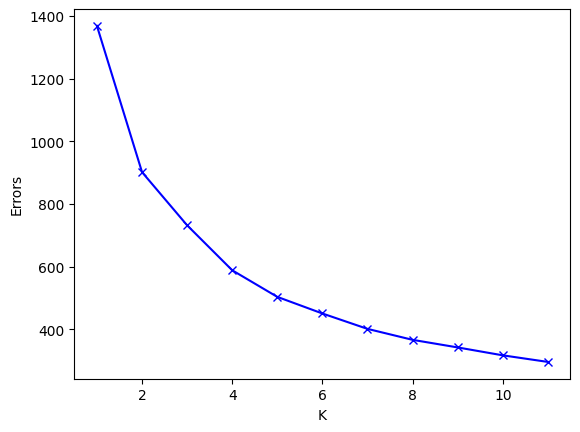

In [ ]:
clusters=range(1,12)
errors=[]
for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(scaled_data)
    errors.append(model.inertia_)
plt.xlabel('K')
plt.ylabel('Errors')
plt.plot(clusters,errors,'bx-')

In [ ]:
model = KMeans(n_clusters = 4)
y_pred = model.fit_predict(scaled_data)
final_df_new['cluster'] = y_pred

In [ ]:
final_df_new.reset_index(inplace=True)
topPlayers = final_df_new.rename(columns = {'index':'PlayerNames'})
topPlayers_cluster = pd.DataFrame(topPlayers[['PlayerNames','cluster']])

In [ ]:
teams1 = topPlayers_cluster.loc[topPlayers_cluster['cluster']==0]
teams1 = teams1['PlayerNames'].tolist()

teams2 = topPlayers_cluster.loc[topPlayers_cluster['cluster']==1]
teams2 = teams2['PlayerNames'].tolist()

teams3 = topPlayers_cluster.loc[topPlayers_cluster['cluster']==2]
teams3 = teams3['PlayerNames'].tolist()

teams4 = topPlayers_cluster.loc[topPlayers_cluster['cluster']==3]
teams4 = teams4['PlayerNames'].tolist()

In [ ]:
TopPlayer_Dataset = pd.DataFrame(teams1,columns=['GOODPLAYERS'])

In [ ]:
TopPlayer_Dataset['BESTPLAYERS']=pd.Series(teams2)
TopPlayer_Dataset['GREATPLAYERS']=pd.Series(teams3)
TopPlayer_Dataset['GOATEDPLAYERS']=pd.Series(teams4)
TopPlayer_Dataset = TopPlayer_Dataset.fillna('')

In [ ]:
TopPlayer_Dataset

,GOODPLAYERS,BESTPLAYERS,GREATPLAYERS,GOATEDPLAYERS
0,AJ Finch,AC Gilchrist,A Mishra,AB de Villiers
1,AM Nayar,AM Rahane,A Nehra,AD Russell
2,Abhishek Sharma,AT Rayudu,AB Dinda,CH Gayle
3,Avesh Khan,BB McCullum,AR Patel,DA Warner
4,BJ Hodge,D Padikkal,Arshdeep Singh,HH Pandya
5,CH Morris,DA Miller,B Kumar,KA Pollard
6,DJ Hooda,DPMD Jayawardene,CV Varun,RA Jadeja
7,DJ Hussey,EJG Morgan,DJ Bravo,RG Sharma
8,DR Smith,G Gambhir,DL Chahar,S Dhawan
9,F du Plessis,Ishan Kishan,DS Kulkarni,SK Raina
